# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

# Import DataSet

In [6]:
from sklearn.datasets import load_digits

In [7]:
df = load_digits()

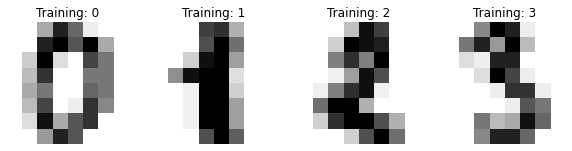

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# Data Preprocessing

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# Scaling data

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.7, random_state = 132529)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

# Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [32]:
y_pred = rf.predict(X_test)

In [33]:
y_pred

array([7, 1, 2, ..., 1, 5, 7])

# Model Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test, y_pred)

array([[119,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 125,   0,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0, 124,   1,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0, 114,   0,   1,   0,   1,   1,   2],
       [  0,   0,   0,   0, 117,   0,   0,   3,   0,   0],
       [  1,   0,   0,   0,   2, 117,   0,   0,   0,   6],
       [  0,   1,   0,   0,   1,   2, 123,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 134,   1,   0],
       [  0,  11,   2,   0,   1,   0,   0,   1, 111,   2],
       [  0,   1,   0,   1,   0,   3,   0,   8,   3, 112]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.90      0.98      0.94       128
           2       0.98      0.98      0.98       126
           3       0.96      0.95      0.95       120
           4       0.96      0.97      0.97       120
           5       0.95      0.93      0.94       126
           6       1.00      0.97      0.98       127
           7       0.91      0.99      0.95       135
           8       0.96      0.87      0.91       128
           9       0.91      0.88      0.89       128

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

